주성분 분석(Principal Component Analysis)
===========

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

주성분 분석 소개
-----------

주성분 분석은 데이터의 차원 축소를 위한 빠르고 유연한 비지도 학습 기법이다  

(-0.057082484426478994,
 1.1527969117775156,
 -0.032601100044520014,
 0.3332251508291321)

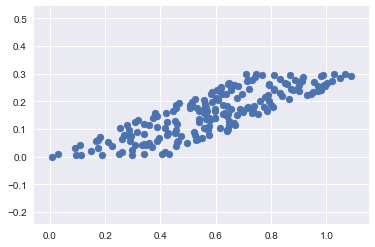

In [3]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.rand(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal')

위와 같은 예시에서 지도 학습인 선형 회귀는 x값으로부터 y값을 예측하겠지만  
비지도 학습인 주성분 분석은 x와 y값 사이의 관계에 대해 학습하는 것이다.  

주성분 분석에서는 이 관계가 데이터 주축(principal axis)의 목록을 구하고,   
그 축을 사용해 데이터 세트를 설명함으로서 정량화된다.  

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

적합은 데이터로부터 얻은 수량을 학습하는데, 가장 중요한 것은   
**'성분(component)'**과 **'설명 분산(explained variance)'**이다.  

In [7]:
print(pca.components_)

[[-0.9534372  -0.30159162]
 [ 0.30159162 -0.9534372 ]]


In [8]:
print(pca.explained_variance_)

[0.06022031 0.00197053]


이 숫자들이 의미하는 바를 알기 위해 입력 데이터 위에 이 숫자들을 벡터로 시각화하자.  
이 때 '성분'은 벡터의 방향을 정의하는데 사용되고   
'설명 분산'은 해당 벡터의 제곱 길이를 정의하는 데 사용된다    

(-0.057082484426478994,
 1.1527969117775156,
 -0.032601100044520014,
 0.3332251508291321)

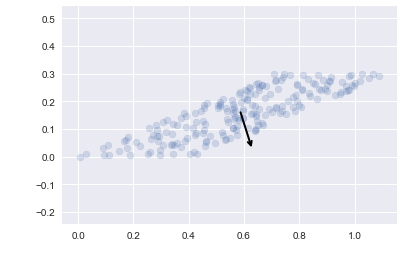

In [12]:
def draw_vector(v0, v1, ax = None):
    ax = ax or plt.gca()
    arrowprops = dict(arrowstyle = '->',
                     linewidth = 2,
                     shrinkA = 0,
                     shrinkB = 0)
    ax.annotate('', v1, v0, arrowprops = arrowprops)

# 데이터 플로팅
plt.scatter(X[:, 0], X[:, 1], alpha = 0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal')

이 벡터들은 데이터의 주축을 나타내고, 길이는 그 축이 데이터 분포를 설명하는 데    
얼마나 '중요한지'를 나타낸다. 이것은 데이터를 그 축에 사영했을 때 데이터 분산의 측도다.  
각 데이터 점을 주축에 사영한 것이 데이터의 '주성분'이다.  

데이터 축에서 주축으로의 변환은 유사 변환(affine transformation)으로,  
기본적으로 이동, 회전, 균등 크기 조절로 구성됨을 의미한다.  

PCA 응용 : 차원 축소
    -------------

차원 축소를 위해 PCA를 사용하면 가장 작은 주성분 중 하나 이상을 삭제해  
최대 데이터 분산을 보존하는 더 작은 차원으로 데이터를 사영한다  

In [14]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print('original shape : ', X.shape)
print('transformed shape : ', X_pca.shape)

original shape :  (200, 2)
transformed shape :  (200, 1)


(-0.057082484426478994,
 1.1527969117775156,
 -0.044158762976644325,
 0.3391025968640133)

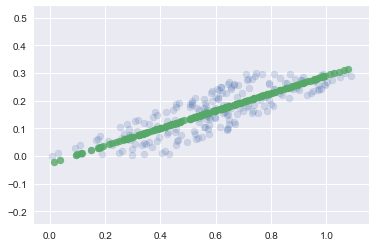

In [15]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha = 0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha = 0.8)
plt.axis('equal')

연한 색 점은 원본 데이터고 어두운 색 점은 사영된 데이터다  
이는 PCA 차원 축소가 의미하는 바를 분명하게 해준다.  
즉 가장 중요하지 않은 주축을 따르는 정보는 삭제하고 가장 높은 분산을 갖는 데이터의  
성분만 남긴다. 잘려나간 분산의 비율은 이 차원에서 얼마나 많은 정보가 버려지는지를   
대략적으로 측정한 척도다.  이 차원이 축소한 데이터세트는 어떤 의미에서 보면 점들   
사이의 가장 중요한 관계를 인코딩하기에는 충분하다. 데이터의 차원을 50%로 줄였음에도    
데이터 점들 사이의 전반적인 관계는 대부분 보존된다.  

PCA를 사용한 시각화 : 손으로 쓴 숫자
    --------------

차원 축소의 유용성은 고차원 데이터를 다룰 때 훨씬 더 분명해진다.  

In [16]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

위의 데이터는 64차원이다.  
이 점들 사이의 관계를 이해하려면 PCA를 사용해   
그것들을 좀 더 관리 가능한 수준의 차원 수로 사영하면 된다 

In [17]:
pca = PCA(2)  # 64차원에서 2차원으로 사영
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


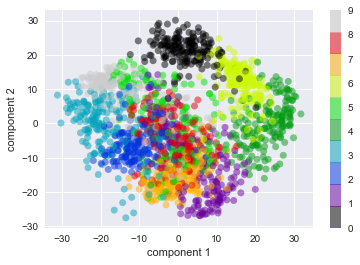

In [18]:
plt.scatter(projected[:, 0], projected[:, 1],
           c = digits.target, edgecolor = 'none', alpha = 0.5,
           cmap = plt.cm.get_cmap('nipy_spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

전체 데이터는 64차원 점의 클라우드고 이점들은 가장 큰 분산을 가지는  
방향을 따라 각 데이터 점을 사영한 것이다. 근본적으로 64차원 공간에서 최적으로  
펼치고 회전해 2차원의 숫자 레이아웃을 찾아냈고, 이 작업을 기존 레이블을  
참조하지 않는 비지도 방식으로 수행했다  

성분의 개수 선택
--------------

성분의 개수는 누적 설명 분산 비율을 보고 결정할 수 있다  

Text(0,0.5,'cumulative explained vairance')

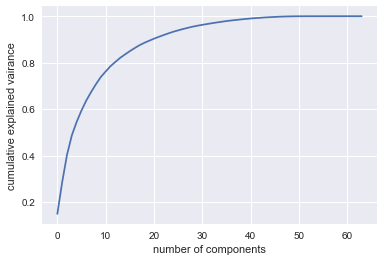

In [21]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained vairance')

이 곡선은 전체 64차원 분산 중 얼마나 많은 부분이 첫 N개 성분 내에  
포함되는지를 정량적으로 보여준다.  첫 10개 성분이 분산의 약 75%를 포함하고 있으며  
분산의 90%를 보존하려면 약 20개의 성분이 필요하다는 것을 알 수 있다  

PCA 응용 : 노이즈 필터링
    -----------

PCA는 노이즈가 섞인 데이터에 대한 필터링 방식으로 사용될 수 있다.  
노이즈의 영향보다 훨씬 더 큰 분산을 가지는 성분이라면 상대적으로  
노이즈에 영향을 받지 않는다는 게 그 개념이다. 따라서 주성분의 가장 큰  
부분집합만 사용해 데이터를 재구성하면 우선적으로 신호는 유지하고 노이즈는   
걸러낼 수 있다.  

먼저 노이즈가 없는 입력 데이터를 플로팅할 것이다

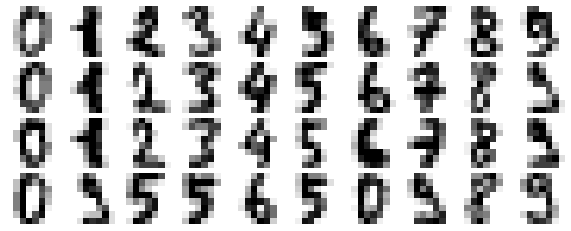

In [24]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize = (10, 4),
                            subplot_kw = {'xticks' : [], 'yticks' : []},
                            gridspec_kw = dict(hspace = 0.1, wspace = 0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                 cmap = 'binary', interpolation = 'nearest',
                 clim = (0, 16))
plot_digits(digits.data)

이제 노이즈가 섞인 데이터세트를 만들기 위해 임의의 노이즈를 추가할 것이다 

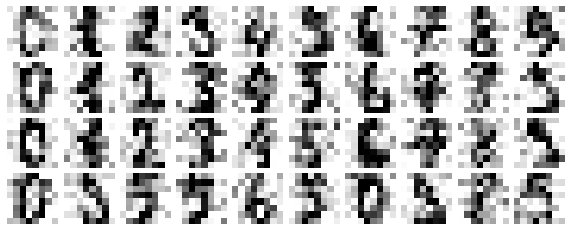

In [25]:
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

PCA가 분산의 50%를 보존하는 조건으로 이 노이즈 섞인 데이터를 훈련시키자

In [26]:
pca = PCA(0.50).fit(noisy)
pca.n_components_

12

여기서 분산의 50%는 12개의 주성분에 달한다.  
이제 이 성분들을 계산한 다음, 변환의 역을 사용해 필터링된 숫자를 재구성해보자  

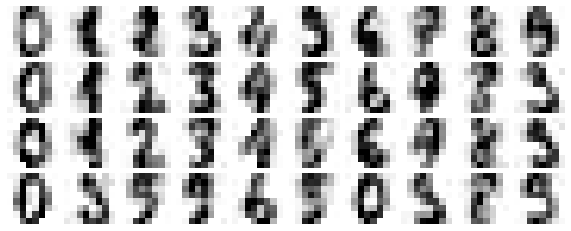

In [28]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

이처럼 PCA는 신호를 보존하고 노이즈를 걸러내는 특성이 있기 때문에 특징 선택  
루틴으로 사용하기에 매우 유용하다. 예를 들어 고차원 데이터에 분류기를 훈련시키는  
것보다, 저차원 표현에 분류기를 훈련시켜 입력 값에 포함된 임의의 노이즈를 자동으로  
걸러내게 하는 것이 나을 수도 있다  

예제 : 고유 얼굴
    ----------

In [31]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person = 60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


이 데이터세트를 생성하는 주축을 살펴보자. 이 데이터세트는 규모가 크기 때문에 RandomizedPCA를  
사용할 것이다. 이것은 일반 PCA 추정기보다 훨씬 더 빠르게 처음 N개의 주성분을 근사하게 계산해내는  
임의화된 메서드를 포함하고 있으며, 그 덕분에 고차원 데이터(이 경우, 거의 3000차원)에 매우 유용하다  
그럼 첫 150개의 성분을 확인해보자  

In [33]:
from sklearn.decomposition import RandomizedPCA
pca = RandomizedPCA(150)
pca.fit(faces.data)

C:\Users\default.DESKTOP-S5Q9GAA\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)


RandomizedPCA(copy=True, iterated_power=2, n_components=150,
       random_state=None, whiten=False)

이 성분들을 전문 용어로 '고유 벡터(eigenvectors)'라고 하며,   
그래서 이러한 유형의 이미지를 '고유 얼굴(eigenfaces)'라고 한다  

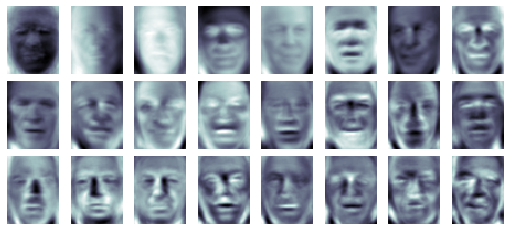

In [36]:
fig, axes = plt.subplots(3, 8, figsize = (9, 4),
                        subplot_kw = {'xticks' : [], 'yticks' : []},
                        gridspec_kw = dict(hspace = 0.1, wspace = 0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap = 'bone')

이 성분들의 누적 분산을 통해 이 사영이 얼마나 많은 데이터 정보를 보존하는지 확인해보자  

Text(0,0.5,'cumulative explained variance')

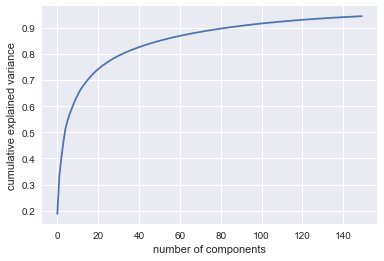

In [38]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

이 150개의 성분이면 분산의 90% 이상을 설명할 수 있음을 알 수 있다  
이로써 이 150개의 성분으로 데이터의 핵심적 특성은 대부분 복수할 수 있다고 믿을 수 있다  
구체적으로 확인하려면 입력 이미지와 이 150개의 성분으로 재구성한 이미지를 비교해보면 된다  

In [39]:
# 성분과 사영된 얼굴 계산
pca = RandomizedPCA(150).fit(faces.data)
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

C:\Users\default.DESKTOP-S5Q9GAA\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)


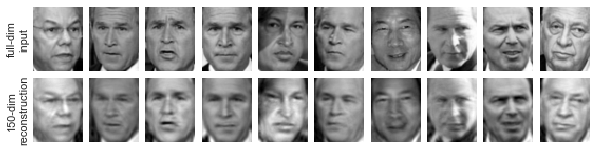

In [40]:
# 결과 플로팅
fig, ax = plt.subplots(2, 10, figsize = (10, 2.5),
                      subplot_kw = {'xticks' : [], 'yticks' : []},
                      gridspec_kw = dict(hspace = 0.1, wspace = 0.1))

for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap = 'binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap = 'binary_r')
    
    ax[0, 0].set_ylabel('full-dim\ninput')
    ax[1, 0].set_ylabel('150-dim\nreconstruction');

PCA 특징 추출이 데이터 차원을 거의 1/20로 줄였음에도 사영된 이미지는 해당 이미지의  
개인을 눈으로 인식할 수 있을 만큼 충분한 정보를 포함하고 있다.  